<a href="https://colab.research.google.com/github/ayushkhanal1/rainfall_prediction_model/blob/main/rainfall_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


In [44]:
rainfall_dataset=pd.read_csv("/content/Rainfall.csv")

In [28]:
rainfall_dataset.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [49]:
rainfall_dataset.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [29]:
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [54]:
rainfall_dataset.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.055908
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [31]:
rainfall_dataset.shape

(366, 12)

In [32]:
rainfall_dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [45]:
rainfall_dataset.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [46]:
rainfall_dataset.columns=rainfall_dataset.columns.str.strip()

In [35]:
rainfall_dataset.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

treating the missing values

In [43]:
rainfall_dataset['winddirection'].unique()


array([None], dtype=object)

In [38]:
rainfall_dataset['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [47]:
rainfall_dataset['winddirection']=rainfall_dataset['winddirection'].fillna(rainfall_dataset['winddirection'].mode()[0])
rainfall_dataset['windspeed']=rainfall_dataset['windspeed'].fillna(rainfall_dataset['windspeed'].mean())

In [48]:
rainfall_dataset.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


changing categorical value of yes and no into numbers

In [50]:
rainfall_dataset['rainfall']=rainfall_dataset['rainfall'].map({'yes':1,'no':0})

EDA

In [51]:
sns.set_style('whitegrid')

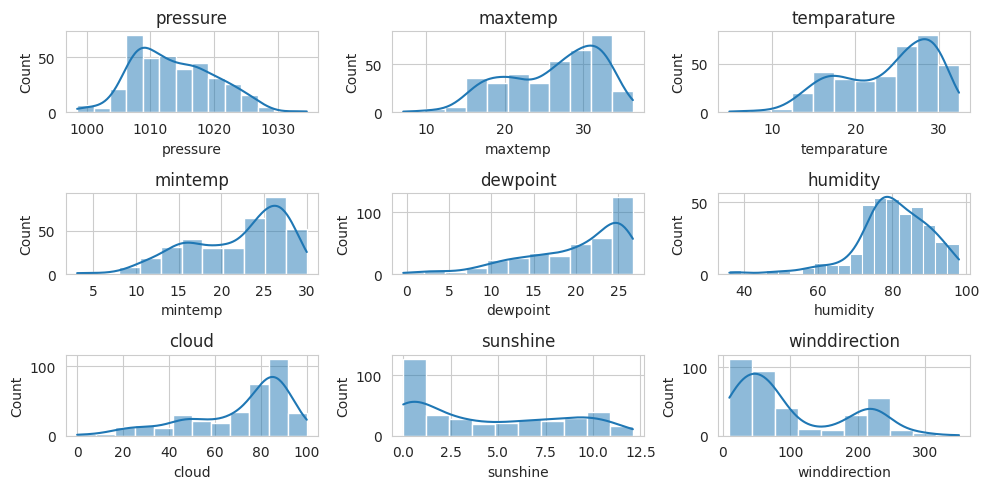

In [57]:
plt.figure(figsize=(10,5))
for i,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',]):
  plt.subplot(3,3,i+1)
  sns.histplot(rainfall_dataset[column],kde=True)
  plt.title(column)
plt.tight_layout()
plt.show()

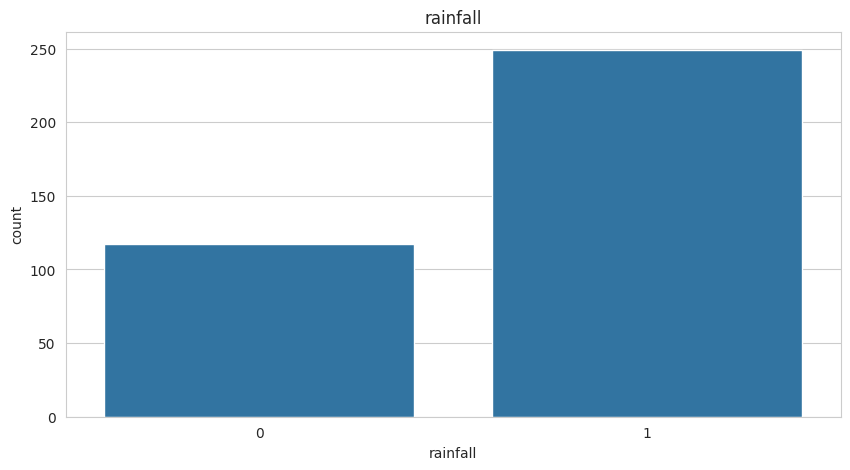

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x='rainfall',data=rainfall_dataset)
plt.title('rainfall')
plt.show()

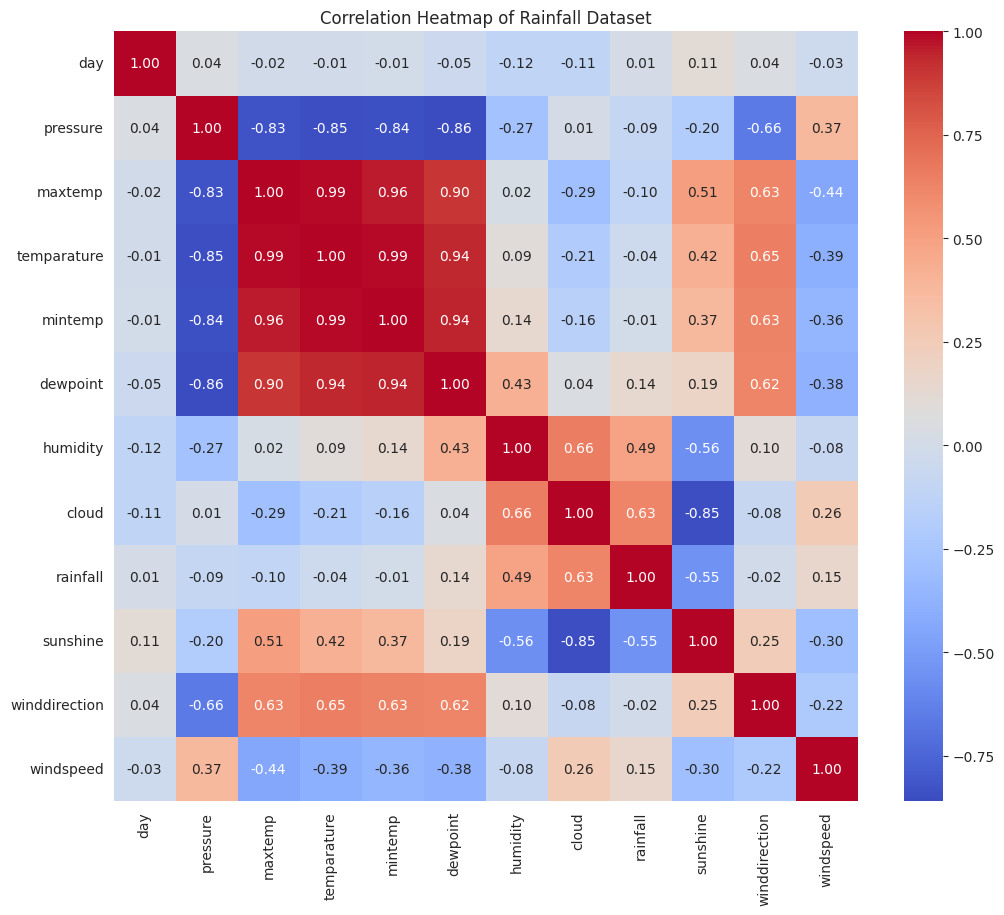

In [59]:
plt.figure(figsize=(12, 10))
sns.heatmap(rainfall_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Rainfall Dataset')
plt.show()

removing the highly correlated features

In [60]:
rainfall_dataset=rainfall_dataset.drop(['temparature', 'mintemp', 'dewpoint'],axis=1)

In [61]:
rainfall_dataset.head()

,day,pressure,maxtemp,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,95,81,1,0.0,40.0,13.7


In [62]:
rainfall_dataset['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


there is class imbalance between true and false class so we need to improve this class imbalance problem,for that we will take all 117 available "no" class and we will also match the "yes" class records to same number by removing the other records.

In [63]:
df_majority_class=rainfall_dataset[rainfall_dataset['rainfall']==1]
df_minority_class=rainfall_dataset[rainfall_dataset['rainfall']==0]

now downsample the majority class to match the minority class

In [65]:
df_majority_downsampled=resample(df_majority_class,replace=False,n_samples=len(df_minority_class),random_state=42)

In [66]:
df_majority_downsampled.shape

(117, 9)

In [67]:
df_minority_class.shape


(117, 9)

In [68]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority_class])

In [69]:
df_downsampled.shape

(234, 9)

shuffling the concatenated df

In [71]:
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [72]:
X=df_downsampled.drop(['rainfall','day'],axis=1)
y=df_downsampled['rainfall']

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
rf_model=RandomForestClassifier(random_state=42)

In [75]:
param_grid_rf={
    'n_estimators':[100,200,300],
    'max_features':['sqrt','log2'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [76]:
grid_search_rf=GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=6,n_jobs=-1,verbose=2)

In [77]:
grid_search_rf.fit(X_train,y_train)

Fitting 6 folds for each of 216 candidates, totalling 1296 fits


GridSearchCV(cv=6, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [79]:
best_model_rf=grid_search_rf.best_estimator_
print(grid_search_rf.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


 training the model with default hyperparameter to check if there is any significant difference in the accuracy

In [80]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [82]:
x_test_prediction_best=best_model_rf.predict(X_test)
x_test_prediction_default=rf_model.predict(X_test)
accuracy_of_best_model=accuracy_score(y_test,x_test_prediction_best)
accuracy_of_default_model=accuracy_score(y_test,x_test_prediction_default)
print("accuracy of best model:",accuracy_of_best_model)
print("accuracy of default model:",accuracy_of_default_model)

accuracy of best model: 0.851063829787234
accuracy of default model: 0.851063829787234


In [83]:
cv_scores_best=cross_val_score(best_model_rf,X_test,y_test,cv=6)
print("cross validation scores for best model:",cv_scores_best)
print("mean cross validation score for best model:",cv_scores_best.mean())

cross validation scores for best model: [0.75       0.875      1.         0.875      1.         0.71428571]
mean cross validation score for best model: 0.8690476190476191


In [85]:
print(confusion_matrix(y_test,x_test_prediction_best))
print(classification_report(y_test,x_test_prediction_best))

[[21  4]
 [ 3 19]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.83      0.86      0.84        22

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47

